In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  
import Simulator as sim

import keras
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers.core import Dense
from keras.optimizers import Adam

from random import randint


### This version time is taken out of model inputs ###


Using TensorFlow backend.


In [40]:
### Creating dataset from data points ###

c = 4   # Damping constant
k = 2   # Stiffness of the spring
m = 20  # Mass
F = 5   # Force


vals = sim.generate(c,k,m,F) ## Generating the training data with separate module ##
vals2 = sim.generate(c,k,m,F, x0=0.2)


list_t = list(zip(np.concatenate((vals[1], vals2[1]), axis=0), np.concatenate((vals[2],vals2[2]), axis=0)))
dframe = pd.DataFrame(list_t, columns=["Speed", 'Position']) ##Creating Pandas DF from data ##
#dframe = dframe.sample(frac=1).reset_index(drop=True) ## Suffle data so we can use validation split ##
print (dframe)

Y = dframe["Position"].iloc[1:] ## Deleting first row so predictions are k+1 ##
X = dframe.head(-1)


         Speed  Position
0     0.000000  0.000000
1     0.014924  0.000449
2     0.029665  0.001789
3     0.044219  0.004009
4     0.058584  0.007097
...        ...       ...
1995 -0.001542  2.498068
1996 -0.001512  2.497976
1997 -0.001481  2.497887
1998 -0.001451  2.497799
1999 -0.001420  2.497712

[2000 rows x 2 columns]


In [41]:
### CUSTOM LOSS FUNCTION ###

### using keras as backed for loss function ###

def custom_loss(y_true, y_pred):
    
    loss = K.square(y_pred - y_true) 
    loss = loss * 0.4
    
    
    return loss

In [42]:

### CREATING NN MODEL ###

model=Sequential([Dense(2,input_shape=(2,), activation="relu"),
                  Dense(4,activation="relu"),
                  Dense(4,activation="relu"),
                  Dense(1)])

model.compile(Adam(lr=0.001),loss=custom_loss)

In [43]:
###TRAINING OF MODEL ###

history = model.fit(X, Y, epochs=200,  validation_split=0.20)

##callbacks= [keras.callbacks.EarlyStopping(patience=5)],

Train on 1599 samples, validate on 400 samples
Epoch 1/200
1599/1599 [==============================] - 1s 325us/step - loss: 2.6884 - val_loss: 2.4501
Epoch 2/200
1599/1599 [==============================] - 0s 166us/step - loss: 2.2434 - val_loss: 2.0550
Epoch 3/200
1599/1599 [==============================] - 0s 167us/step - loss: 1.8693 - val_loss: 1.6795
Epoch 4/200
1599/1599 [==============================] - 0s 163us/step - loss: 1.4703 - val_loss: 1.2243
Epoch 5/200
1599/1599 [==============================] - 0s 161us/step - loss: 0.9767 - val_loss: 0.7009
Epoch 6/200
1599/1599 [==============================] - 0s 162us/step - loss: 0.4877 - val_loss: 0.2678
Epoch 7/200
1599/1599 [==============================] - 0s 174us/step - loss: 0.1623 - val_loss: 0.0541
Epoch 8/200
1599/1599 [==============================] - 0s 180us/step - loss: 0.0409 - val_loss: 0.0048
Epoch 9/200
1599/1599 [==============================] - 0s 184us/step - loss: 0.0193 - val_loss: 1.3140e-04
Epoc

1599/1599 [==============================] - 0s 162us/step - loss: 0.0017 - val_loss: 4.4720e-07
Epoch 76/200
1599/1599 [==============================] - 0s 169us/step - loss: 0.0017 - val_loss: 8.3134e-07
Epoch 77/200
1599/1599 [==============================] - 0s 160us/step - loss: 0.0016 - val_loss: 7.7600e-06
Epoch 78/200
1599/1599 [==============================] - 0s 168us/step - loss: 0.0016 - val_loss: 2.4856e-06
Epoch 79/200
1599/1599 [==============================] - 0s 158us/step - loss: 0.0016 - val_loss: 7.1786e-06
Epoch 80/200
1599/1599 [==============================] - 0s 158us/step - loss: 0.0016 - val_loss: 7.1079e-06
Epoch 81/200
1599/1599 [==============================] - 0s 160us/step - loss: 0.0016 - val_loss: 8.0342e-06
Epoch 82/200
1599/1599 [==============================] - 0s 158us/step - loss: 0.0015 - val_loss: 2.2509e-06
Epoch 83/200
1599/1599 [==============================] - 0s 158us/step - loss: 0.0015 - val_loss: 5.5340e-06
Epoch 84/200
1599/1599 

1599/1599 [==============================] - 0s 246us/step - loss: 0.0014 - val_loss: 1.3015e-06
Epoch 150/200
1599/1599 [==============================] - 0s 213us/step - loss: 0.0014 - val_loss: 1.1097e-04
Epoch 151/200
1599/1599 [==============================] - 0s 158us/step - loss: 0.0014 - val_loss: 6.2967e-06
Epoch 152/200
1599/1599 [==============================] - 0s 168us/step - loss: 0.0014 - val_loss: 1.7411e-05
Epoch 153/200
1599/1599 [==============================] - 0s 162us/step - loss: 0.0013 - val_loss: 5.9979e-05
Epoch 154/200
1599/1599 [==============================] - 0s 160us/step - loss: 0.0014 - val_loss: 1.0685e-05
Epoch 155/200
1599/1599 [==============================] - 0s 208us/step - loss: 0.0014 - val_loss: 1.5911e-05
Epoch 156/200
1599/1599 [==============================] - 0s 207us/step - loss: 0.0014 - val_loss: 6.4206e-09
Epoch 157/200
1599/1599 [==============================] - 0s 185us/step - loss: 0.0014 - val_loss: 3.7703e-05
Epoch 158/200
1

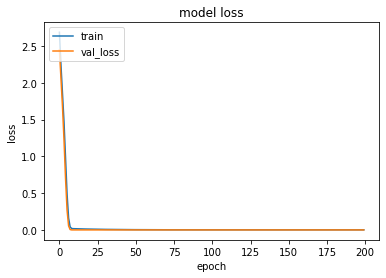

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'], loc='upper left')
plt.show()

In [48]:
### Creating testing data ###

#c = 5 # Damping constant
#k = 6 # Stiffness of the spring
#m = 40 # Mass
F2 = randint(1,10)  #Different force for testing


testvals = sim.generate(c,k,m,F2,x0=0.1) ## Generating testing data##


list_t2 = list(zip( testvals[1], testvals[2]))
dframe2 = pd.DataFrame(list_t2, columns=["Speed", 'Position'])
timeframe = pd.DataFrame(testvals[0], columns=["Time"]) ## For plotting resutlts


print (dframe2)

Y2 = dframe2["Position"].iloc[1:]
X2 = dframe2.head(-1)


        Speed  Position
0    0.000000  0.100000
1    0.005373  0.100162
2    0.010679  0.100644
3    0.015919  0.101443
4    0.021090  0.102555
..        ...       ...
995 -0.000604  0.999243
996 -0.000592  0.999208
997 -0.000580  0.999172
998 -0.000568  0.999138
999 -0.000556  0.999104

[1000 rows x 2 columns]


1999/1999 [==============================] - 0s 17us/step
0.0010664246637415685


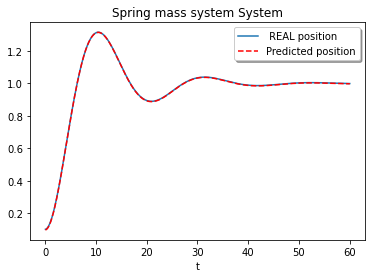

In [49]:
#### Test ####

results = model.evaluate(X, Y, batch_size=128)
print(results)

y_pred = [] ## List for predictions

for row in X2.itertuples(): ## Iterates trough test set getting predictions
    xr = model.predict(np.array([[row.Speed, row.Position]])) 
    y_pred.append(float(xr[0]))

 

plt.plot(timeframe.iloc[1:], Y2)
plt.plot(timeframe.iloc[1:], y_pred, linestyle='dashed', color='red')

plt.xlabel('t')
plt.legend([' REAL position',  'Predicted position'], shadow=True)
plt.title('Spring mass system System')
plt.show()

In [14]:
keras.backend.clear_session() ## To start over again